### Finding the output signal of a low-pass filter using a Runge Kutta method
_Author: Jorge Vera Moreno_

A low-pass filter is a device that cuts off signals above a given voltage value (shown in Fig. 1).

Let $I$ be the current that flows through the resistor $R$ and into the capacitor $C$, with a charge $Q$ on the capacitor. Then we have

$$
IR = V_{\rm in} - V_{\rm out}, \\
 Q = C V_{\rm out}, \\
 I = \frac{dQ}{dt}.$$

Rearranging this gives a first-order differential equation:
$$ \frac{dV_{\rm out}}{dt} = \frac{1}{RC} ( V_{\rm in} - V_{\rm out}). $$

This differential equation can be solved for a given $V_{\rm in}$ using a Runge Kutta method. Here we will use the fourth-order Runge Kutta method, considered to have the most useful combination of simplicity and accuracy, and is the most widely used method to solve differential equations numerically.

First, we will import NumPy and Matplotlib:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

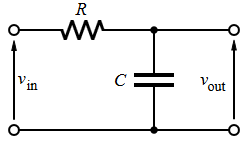

In [2]:
Image(filename='circuit.png')

Fig. 1: Circuit diagram of a low-pass filter.



We can now define a function that will return our choice of $V_{\rm in}$. We will choose a square wave of amplitude 1 as our input signal:

In [3]:
def Vin(t):
    '''Gives the value of the input voltage at a given time
    Inputs: time value
    Returns: input voltage value
    '''
#    theList = [] #Initialise empty array
#    for i in t: #Check if the i-th element of the argument is even or odd
    if (np.floor(2*t) % 2) == 0: #if the number is even (n mod 2 = 0), return 1
        return 1.0
    else: #otherwise return -1
        return (-1.0)

To later plot our input signal, we will now define a function $y$ that returns an array of $V_{\rm in}$ when given a array of $t$:

In [4]:
def y(tpoints):
    '''Calculate the array of values corresponding to a square wave with amplitude 1
    Inputs: array of t-values
    Returns: array of values corresponding to the square wave
    '''
    List = [] #initialise empty list to append items
    for t in tpoints:
        List.append(Vin(t)) #append the value of the square wave at time t
    return List

We now define our time interval: $0\leq t \leq 10$ $\mu s$, as well as the number of points in our domain, in this case, 1000.

In [5]:
a = 0.0          # Start of interval (in microseconds)
b = 10.0         # end of interval (in microseconds)
N = 1000          # number of steps. 1000 gives a nice smooth line
h = (b-a)/N      # size of each step, i.e. delta t
Vout = 0.0         # initial condition (in Volts)
tpoints = np.arange(a,b,h) #Define the domain (time)

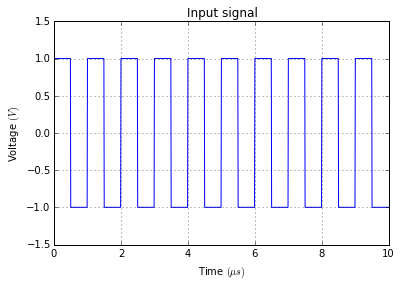

In [6]:
#Plot the square wave in the specified time domain
plt.plot(tpoints,y(tpoints))
plt.xlabel("Time $(\mu s)$")
plt.ylabel("Voltage $(V)$")
plt.title("Input signal")
plt.ylim(-1.5, 1.5)
plt.grid()

We can now define a function $f$: $$ f(V_{\rm out},t) = \frac{dV_{\rm out}}{dt} = \frac{1}{RC} ( V_{\rm in}(t) - V_{\rm out}). $$

We can use the Runge Kutta method to solve for $V_{\rm out}$ by plugging in $f$ in the fourth-order Runge Kutta equations:

$$
k_1 = h f(V_{\rm out},t), \\
k_2 = h f(V_{\rm out}+\frac{1}{2}k_1, t+\frac{1}{2}h), \\
k_3 = h f(V_{\rm out}+\frac{1}{2}k_2, t+\frac{1}{2}h), \\
k_4 = h f(V_{\rm out}+k_3, t+h), \\
x(t+h) = V_{\rm out}(t) + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4).
$$

where $h$ is the step previously defined.

In [7]:
def f(Vout,t,RC):
    '''Calculate the square wave with amplitude 1
    Inputs: array of t-values
    Returns: array of values according to the square wave
    '''
    return (Vin(t)-Vout)/RC

In [8]:
def RungeKutta4(x,tpoints,RC):
    '''Fourth-order Runge Kutta. Inputs: initial x, array of t-values
    Also depends on step h (global variable) and
    requires the function f(x,t) to be defined.
    Returns: array of propagated xpoints'''
    xpoints = [] # a new array for the fourth-order results
    # same procedure as before. When you re-use this function, comment it appropriately!
    for t in tpoints:
        xpoints.append(x) 
        k1 = h*f(x,t,RC)     
        k2 = h*f(x+0.5*k1, t+0.5*h,RC)
        k3 = h*f(x+0.5*k2, t+0.5*h,RC)
        k4 = h*f(x+k3, t+h,RC)
        x = x + (k1 + 2*k2 + 2*k3 + k4)/6
    return xpoints

We can finally plot our input and output signals. We will use three different values for the time constant:

$$RC \in \{0.01,0.1,1\} \quad \mu s$$

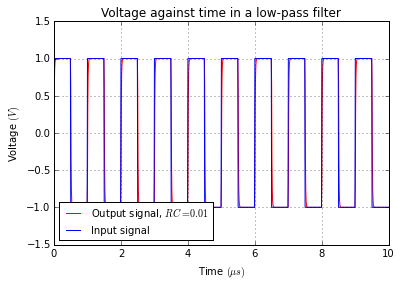

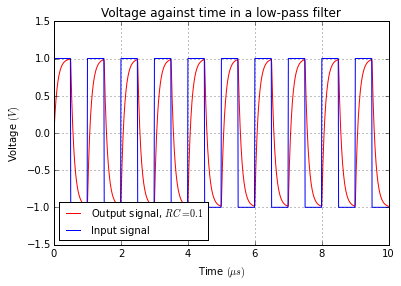

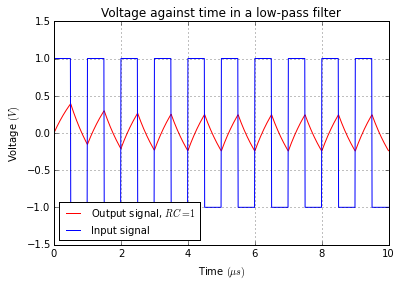

In [9]:
#Produce three different plots for each value of RC (0.01, 0.1 & 1)
for i, j in zip([0.01,0.1,1],[0,1,2]): #Iterate i (RC values) and j (plot number)
    plt.figure(j) #Plot the j-th figure
    xpointsRK4 = RungeKutta4(Vout,tpoints,i) #Output signal calculated using the Runge Kutta method
    plt.plot(tpoints,xpointsRK4, 'r', label='Output signal, $RC= %s $'%i) #Plot the output signal
    plt.plot(tpoints,y(tpoints),'b', label='Input signal') #Plot the input signal
    plt.xlabel("Time $(\mu s)$")
    plt.ylabel("Voltage $(V)$")
    plt.title("Voltage against time in a low-pass filter")
    plt.legend(loc="lower left",prop={'size':10})
    plt.ylim(-1.5,1.5)
    plt.grid()

The filter only allows the pass of signals that are below a threshold. As it can be clearly seen in the second and third plots, the input signal voltage goes from -1 to 1. The output voltage increases fast at first. However, as the input voltage approaches 1, the output voltage drops suddenly.

We can now try a different function as input and see what the output is. In this case $V_{\rm in} = A\sin(2t)$ (where $A=1V$) and $RC$ has the same values:

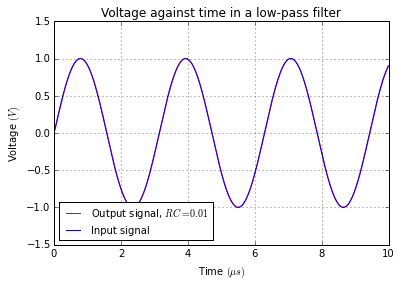

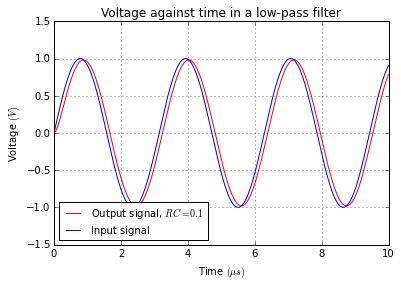

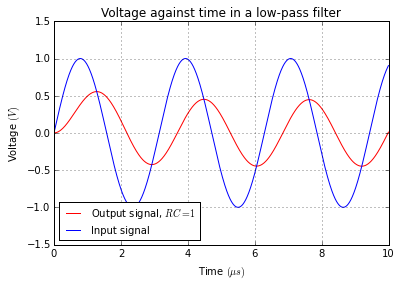

In [10]:
def Vin(t):
    '''Gives the value of the input voltage at a given time
    Inputs: time value
    Returns: input voltage value
    '''
    return np.sin(2*t)
for i, j in zip([0.01,0.1,1],[0,1,2]): #Iterate i (RC values) and j (plot number)
    plt.figure(j) #Plot the j-th figure
    xpointsRK4 = RungeKutta4(Vout,tpoints,i) #Output signal calculated using the Runge Kutta method
    plt.plot(tpoints,xpointsRK4, 'r', label='Output signal, $RC= %s $'%i) #Plot the output signal
    plt.plot(tpoints,y(tpoints),'b', label='Input signal') #Plot the input signal
    plt.xlabel("Time $(\mu s)$")
    plt.ylabel("Voltage $(V)$")
    plt.title("Voltage against time in a low-pass filter")
    plt.legend(loc="lower left",prop={'size':10})
    plt.ylim(-1.5,1.5)
    plt.grid()

We can see that the low-pass filter affects an input sine wave by reducing the amplitude (as a function of time) and shifting the phase forwards in time.